# Proyecto Mineria de Datos (Arboles de Decision)

---
Alumno: Angel Alonso Galarza Chavez <br>
Materia: Mineria de Datos <br>
Docente: Dra. Xiaoou Li

---

## Importando las bibliotecas

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

from chefboost import Chefboost as chef

from IPython.display import display, HTML

## Analisis Exploratorio de Datos

### Cargando el Dataset

In [2]:
# Lista con los nombres de las caracteristicas
adults_name = ['age',
'workclass',
'fnlwgt',
'education',
'education-num',
'marital-status',
'occupation',
'relationship',
'race',
'sex',
'capital-gain',
'capital-loss',
'hours-per-week',
'native-country',
'target']

adults_name

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'target']

In [3]:
# Con la biblioteca pandas para manejo de datos, se cargan los datos del dataset Iris a la variable df_iris
df_income_train = pd.read_csv('../Datasets/adult/adult.data', names=adults_name, header=None)
df_income_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Con la biblioteca pandas para manejo de datos, se cargan los datos del dataset Iris a la variable df_iris
df_income_test = pd.read_csv('../Datasets/adult/adult.test', names=adults_name, header=None)
df_income_test['target'] = df_income_test['target'].replace([' <=50K.', ' >50K.'], [' <=50K', ' >50K'])
df_income_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df_income = pd.concat([df_income_train, df_income_test], axis = 0)
df_income.reset_index(drop=True, inplace=True)
df_income

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [6]:
# Valores que contiene cada atributo
for feature in adults_name:
    print('feature values: ', feature, df_income[feature].unique())

feature values:  age [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
feature values:  workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
feature values:  fnlwgt [ 77516  83311 215646 ... 173449  89686 350977]
feature values:  education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
feature values:  education-num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
feature values:  marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
feature values:  occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-

In [7]:
# Contando los valores nulos en el conjunto de datos
for columna in adults_name:
    conteo = df_income[columna].replace(['?', ' ', ' ?'], np.nan).isnull().sum()
    if conteo > 0:
        porcentaje = (conteo /  df_income['age'].shape[0]) * 100 
        print(f"Cantidad de valores nulos en la columna {columna}: {conteo} = {porcentaje.round(2)}%")

Cantidad de valores nulos en la columna workclass: 2799 = 5.73%
Cantidad de valores nulos en la columna occupation: 2809 = 5.75%
Cantidad de valores nulos en la columna native-country: 857 = 1.75%


### Histograma de los atributos

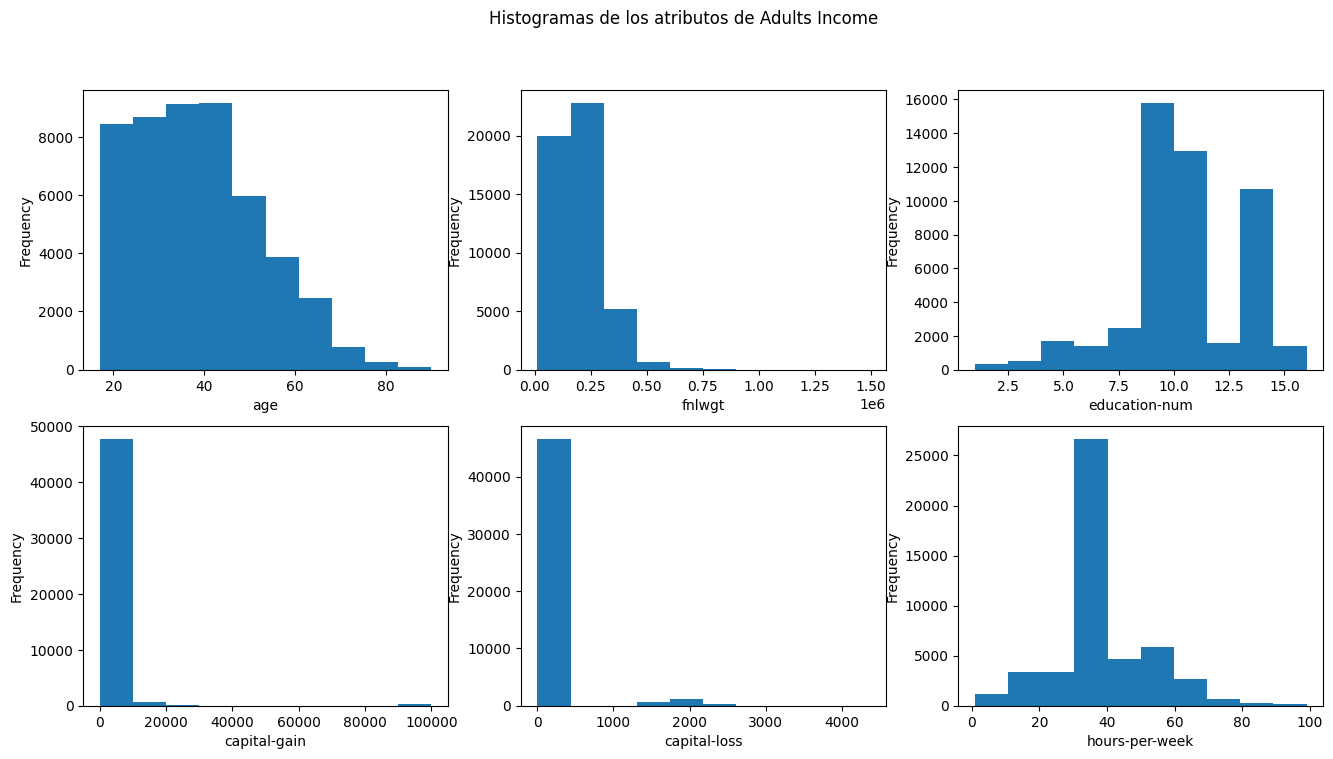

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
col_num_att = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

def create_histogram(ax, data, column_name, x_label, y_label):
    ax.hist(data)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# Loop through each subplot and create a histogram
for i, name in enumerate(col_num_att):
    row = int(i / 3)
    col = i % 3
    create_histogram(axs[row, col], df_income[name], name, name, 'Frequency')

#fig.tight_layout()
fig.suptitle('Histogramas de los atributos de Adults Income')
plt.show()

### Grafico de barras de los atributos categoricos

#### Atributo Workclass

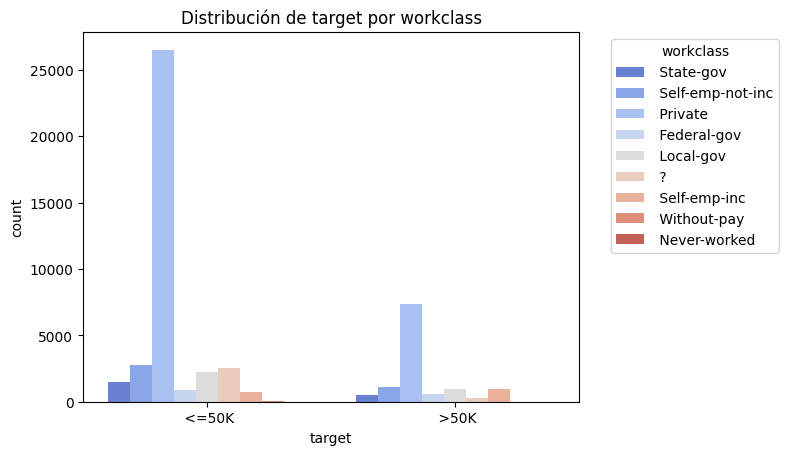

In [9]:
cols = ['workclass', 'education', 'marital-status','occupation', 'relationship', 'race', 'sex', 'native-country']

sns.countplot(x='target', hue=cols[0], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {cols[0]}')
plt.legend(title=cols[0], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
plt.show()

#### Atributo Education

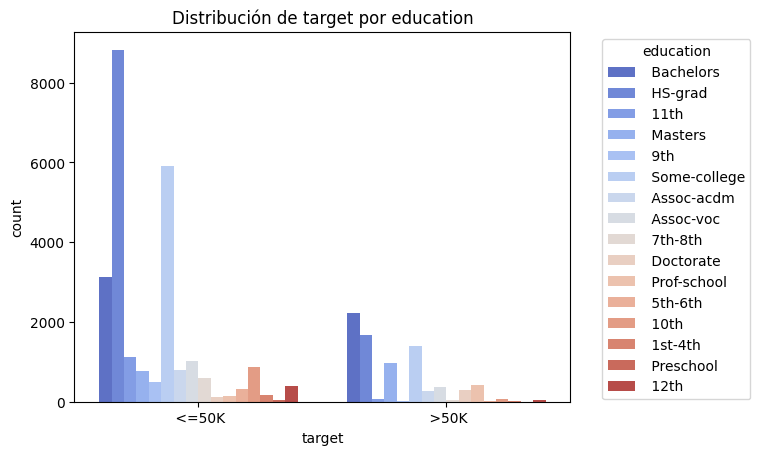

In [122]:
sns.countplot(x='target', hue=cols[1], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {cols[1]}')
plt.legend(title=cols[1], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
plt.show()

#### Atributo Marital-status

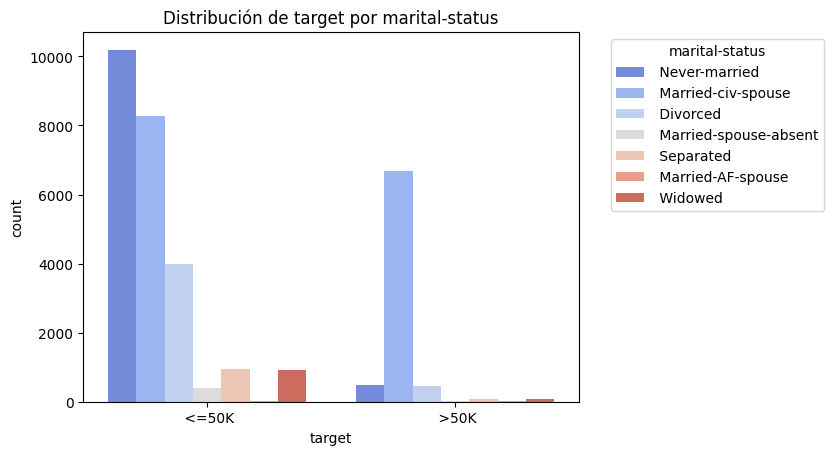

In [123]:
sns.countplot(x='target', hue=cols[2], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {cols[2]}')
plt.legend(title=cols[2], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
plt.show()

#### Atributo Occupation

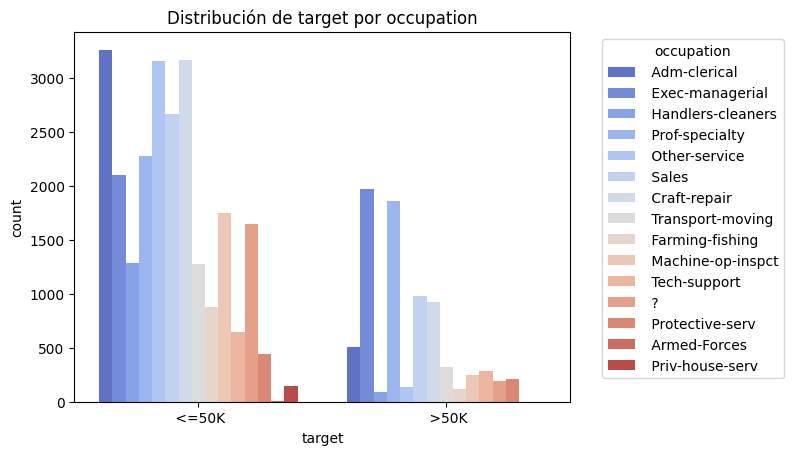

In [124]:
sns.countplot(x='target', hue=cols[3], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {cols[3]}')
plt.legend(title=cols[3], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
plt.show()

#### Atributo Relationship

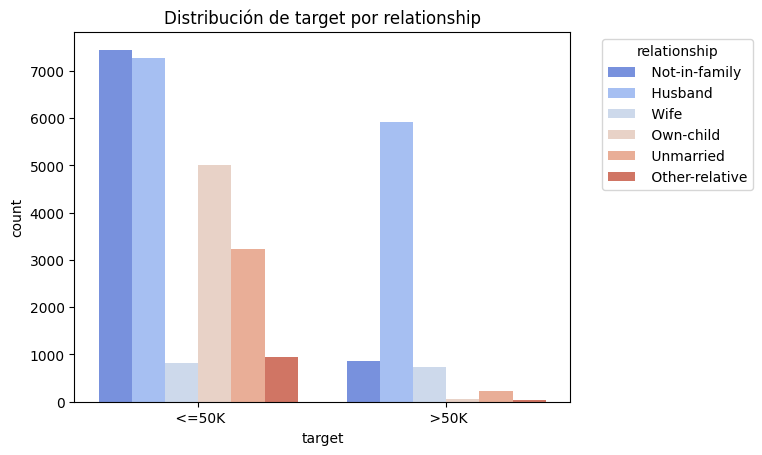

In [125]:
sns.countplot(x='target', hue=cols[4], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {cols[4]}')
plt.legend(title=cols[4], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
plt.show()

#### Atributo Race

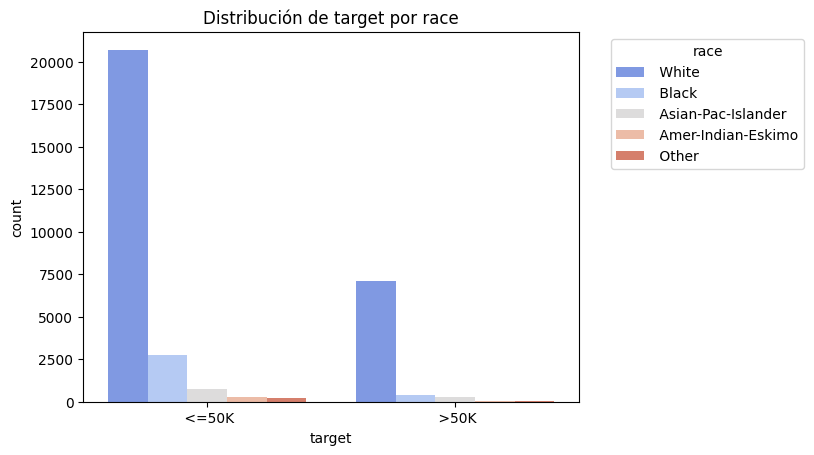

In [126]:
sns.countplot(x='target', hue=cols[5], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {cols[5]}')
plt.legend(title=cols[5], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
plt.show()

#### Atributo Sex

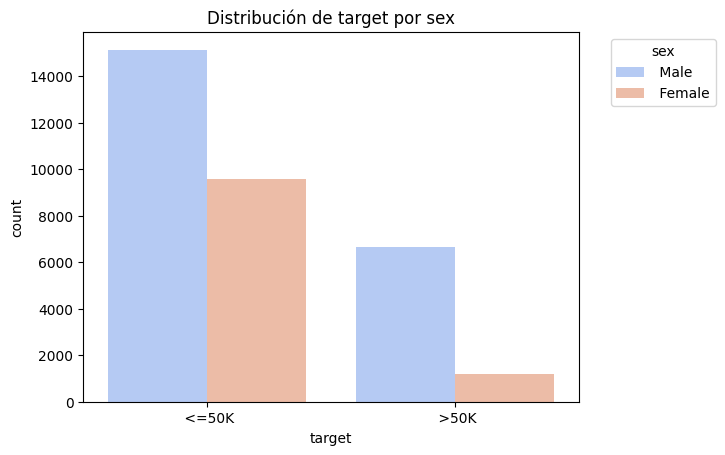

In [127]:
sns.countplot(x='target', hue=cols[6], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {cols[6]}')
plt.legend(title=cols[6], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
plt.show()

#### Atributo Native-country

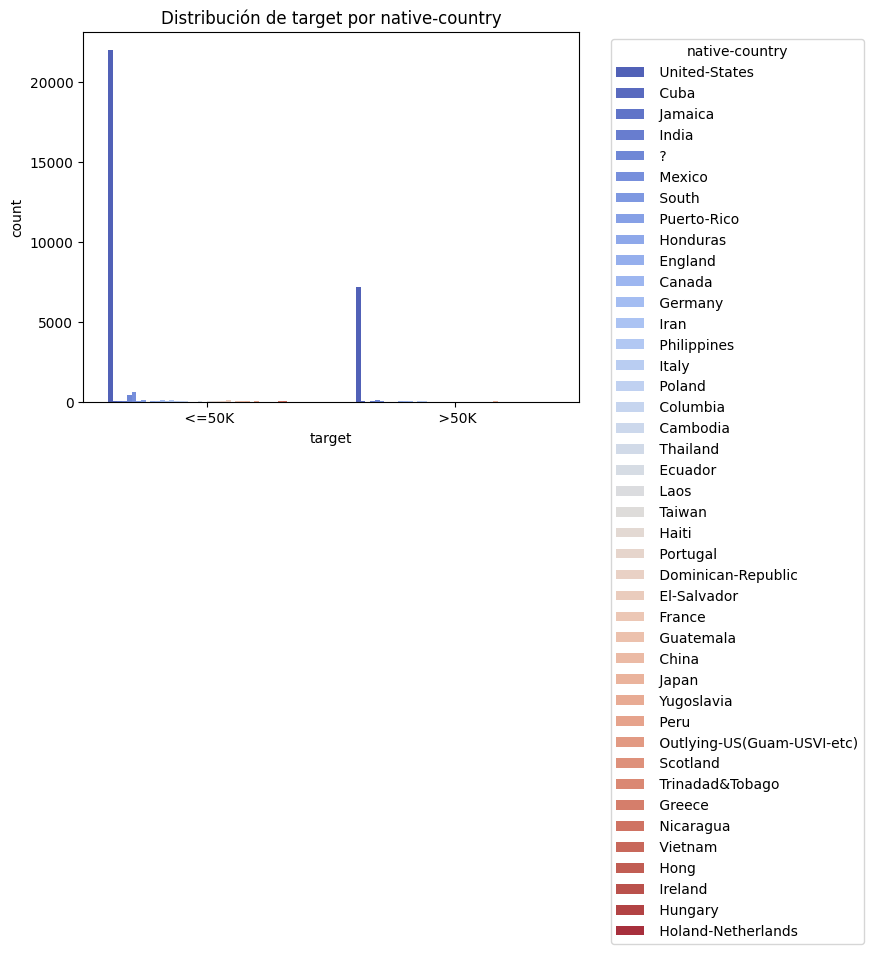

In [129]:
sns.countplot(x='target', hue=cols[7], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {cols[7]}')
plt.legend(title=cols[7], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
plt.show()

## Preprocesamiento de Datos

### Limpieza de los datos

#### Rellenado de valores nulos

In [10]:
#conteo = df_income[columna].replace(['?', ' ', ' ?'], np.nan).isnull().sum()
#Transformando los valores que representan nulo a verdaderos valores nulos
# Contando los valores nulos en el conjunto de datos
for columna in adults_name:
    df_income[columna] = df_income[columna].replace(['?', ' ', ' ?'], np.nan)
print(df_income.isnull().sum())


age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
target               0
dtype: int64


In [11]:
# Para la limpieza de los datos vamos a rellenar los valores nulos que existen en los atributos con el valor mas frecuente de cada atributo
mode_work = df_income['workclass'].mode()
mode_occu = df_income['occupation'].mode()
mode_native = df_income['native-country'].mode()
#moda = df['fruta'].mode()
print('moda de workclass ->      ', mode_work[0])
print('moda de occupation ->     ', mode_occu[0])
print('moda de native-country -> ', mode_native[0])

moda de workclass ->        Private
moda de occupation ->       Prof-specialty
moda de native-country ->   United-States


In [12]:
# Rellenando los valores con la moda en los atributos con valores nulos
df_income['workclass'] = df_income['workclass'].fillna(mode_work[0])
df_income['occupation'] = df_income['occupation'].fillna(mode_occu[0])
df_income['native-country']= df_income['native-country'].fillna(mode_native[0])

In [13]:
# Comprobacion de que no existe valores nulos
print(df_income.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64


#### Reduccion de datos

In [14]:
# Atributo capital-loss
# Se puede reducir a dos valores (=0 y >0 ) del rango [0, 1]
df_income['capital-loss'].value_counts()

# Atributo Age
df_income['capital-loss'] = np.where(df_income['capital-loss'] > 0, '>0', '0')
df_income['capital-loss'].unique()

array(['0', '>0'], dtype=object)

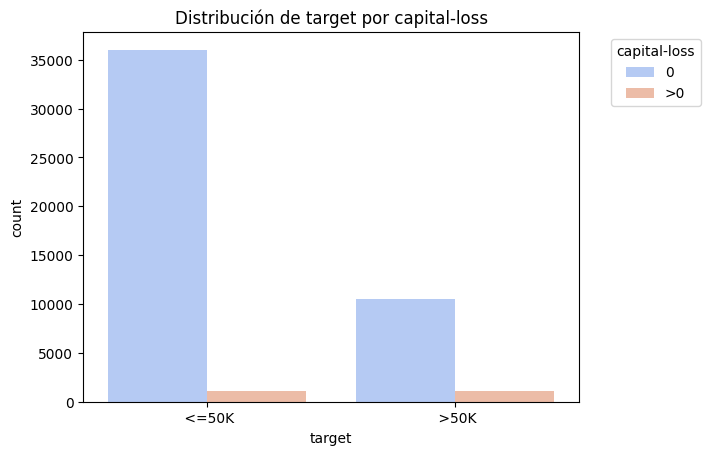

In [15]:
sns.countplot(x='target', hue=col_num_att[4], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {col_num_att[4]}')
plt.legend(title=col_num_att[4], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
plt.show()

In [16]:
# Atributo capital-gain
# Se puede reducir a dos valores (=0 y >0 ) del rango [0, 1]
df_income['capital-gain'].value_counts()

# Atributo Age
df_income['capital-gain'] = np.where(df_income['capital-gain'] > 0, '>0', '0')
df_income['capital-gain'].unique()

array(['>0', '0'], dtype=object)

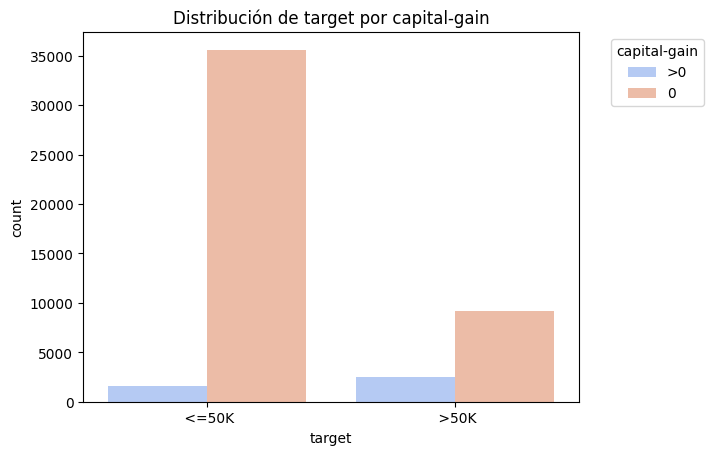

In [17]:
sns.countplot(x='target', hue=col_num_att[3], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {col_num_att[3]}')
plt.legend(title=col_num_att[3], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
plt.show()

In [18]:
# Atributo education
df_income['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [19]:
# Se puede reducir la cantidad de variables categoricas si se agrupan
df_income['education'] = df_income['education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'], 'elementary-school')
df_income['education'] = df_income['education'].replace([' Assoc-acdm', ' Assoc-voc'], 'other')
# Atributo education
df_income['education'].unique()

array([' Bachelors', ' HS-grad', 'elementary-school', ' Masters',
       ' Some-college', 'other', ' Doctorate', ' Prof-school'],
      dtype=object)

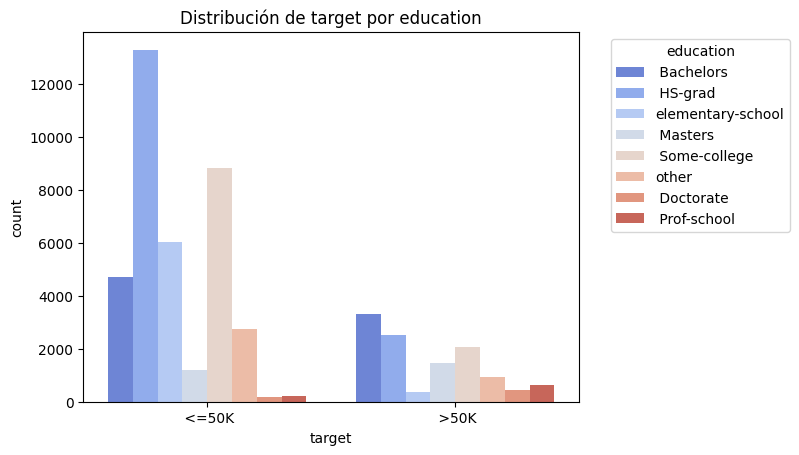

In [20]:
sns.countplot(x='target', hue=cols[1], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {cols[1]}')
plt.legend(title=cols[1], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
plt.show()

In [21]:
# Atributo Age
df_income['age'] = np.where(df_income['age'] <= 40, '<=40', '>40')
df_income['age'].unique()

array(['<=40', '>40'], dtype=object)

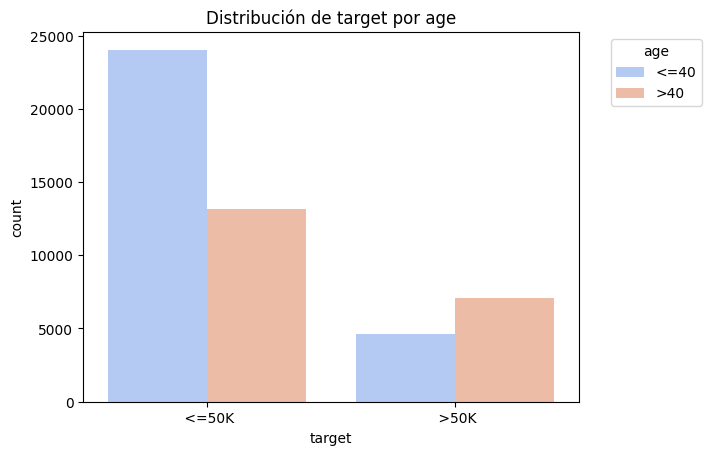

In [22]:
sns.countplot(x='target', hue=col_num_att[0], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {col_num_att[0]}')
plt.legend(title=col_num_att[0], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
plt.show()

In [23]:
# Atributo marital-status
df_income['marital-status'] = df_income['marital-status'].replace([' Married-civ-spouse', ' Married-AF-spouse'], 'married')
df_income['marital-status'] = df_income['marital-status'].replace([' Never-married', ' Divorced', ' Married-spouse-absent', ' Separated', ' Widowed'], 'not-married')
# Atributo education
df_income['marital-status'].unique()

array(['not-married', 'married'], dtype=object)

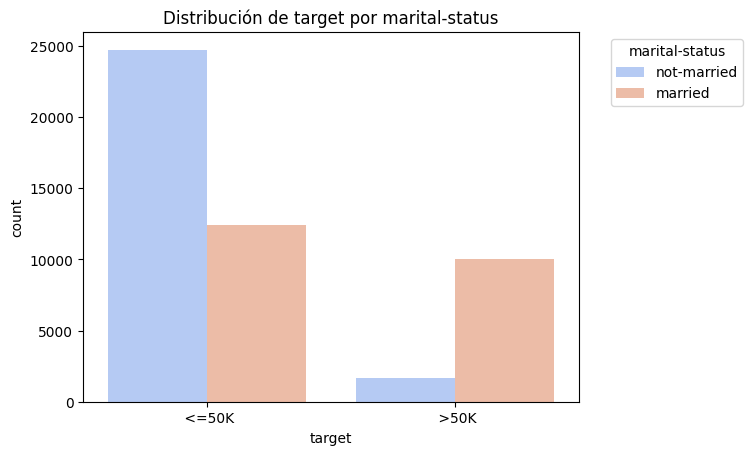

In [24]:
sns.countplot(x='target', hue=cols[2], data=df_income, palette='coolwarm')
plt.title(f'Distribución de target por {cols[2]}')
plt.legend(title=cols[2], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.tight_layout()
plt.show()

### Transformacion de los datos

In [25]:
# Separacion de los features con el target
 

In [26]:
# Transformacion de la columan target a formato numerico (justificar)

# Atributos que se pueden cambiar a formato numerico Age(0, 1), target(0, 1), marital-status(0, 1) 
# education (0, 1, 2, 3, 4, 5, 6, 7), sex (0, 1), native-country (0, 1, 2, 3, , 4, ..., n), occupation (0, 1, 2, 3, , 4, ..., n)

df_income_le = df_income.copy()

le = LabelEncoder()
print('target')
print(df_income_le['target'].unique())
df_income_le['target'].unique()
df_income_le['target'] = le.fit_transform(df_income['target'])
df_income_le['target'].unique()
print(df_income_le['target'].unique())

print('sex')
print(df_income_le['sex'].unique())
df_income_le['sex'].unique()
df_income_le['sex'] = le.fit_transform(df_income['sex'])
df_income_le['sex'].unique()
print(df_income_le['sex'].unique())

print('marita-status')
print(df_income_le['marital-status'].unique())
df_income_le['marital-status'].unique()
df_income_le['marital-status'] = le.fit_transform(df_income['marital-status'])
df_income_le['marital-status'].unique()
print(df_income_le['marital-status'].unique())

print('education')
print(df_income_le['education'].unique())
df_income_le['education'].unique()
df_income_le['education'] = le.fit_transform(df_income['education'])
df_income_le['education'].unique()
print(df_income_le['education'].unique())

print('age')
print(df_income_le['age'].unique())
df_income_le['age'].unique()
df_income_le['age'] = le.fit_transform(df_income['age'])
df_income_le['age'].unique()
print(df_income_le['age'].unique())

print('native-country')
print(df_income_le['native-country'].unique())
df_income_le['native-country'].unique()
df_income_le['native-country'] = le.fit_transform(df_income['native-country'])
df_income_le['native-country'].unique()
print(df_income_le['native-country'].unique())

print('capital-loss')
print(df_income_le['capital-loss'].unique())
df_income_le['capital-loss'].unique()
df_income_le['capital-loss'] = le.fit_transform(df_income['capital-loss'])
df_income_le['capital-loss'].unique()
print(df_income_le['capital-loss'].unique())

print('capital-gain')
print(df_income_le['capital-gain'].unique())
df_income_le['capital-gain'].unique()
df_income_le['capital-gain'] = le.fit_transform(df_income['capital-gain'])
df_income_le['capital-gain'].unique()
print(df_income_le['capital-gain'].unique()) 
 
print('occupation')
print(df_income_le['occupation'].unique())
df_income_le['occupation'].unique()
df_income_le['occupation'] = le.fit_transform(df_income['occupation'])
df_income_le['occupation'].unique()
print(df_income_le['occupation'].unique())

print('workclass')
print(df_income_le['workclass'].unique())
df_income_le['workclass'].unique()
df_income_le['workclass'] = le.fit_transform(df_income['workclass'])
df_income_le['workclass'].unique()
print(df_income_le['workclass'].unique())

target
[' <=50K' ' >50K']
[0 1]
sex
[' Male' ' Female']
[1 0]
marita-status
['not-married' 'married']
[1 0]
education
[' Bachelors' ' HS-grad' 'elementary-school' ' Masters' ' Some-college'
 'other' ' Doctorate' ' Prof-school']
[0 2 6 3 5 7 1 4]
age
['<=40' '>40']
[0 1]
native-country
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
[38  4 22 18 25 34 32 15  8  1 10 19 29 21 30  3  0 36  6 24 35 13 31  5
  7  9 12  2 23 40 28 27 33 37 11 26 39 16 20 17 14]
capital-loss
['0' '>0']
[0 1]
capital-gain
['>0' '0']
[1 0]
occupation
[' Adm-cle

In [27]:
# Utilizando one-hot-encoding
df_income_le = pd.get_dummies(df_income_le, columns=['race', 'relationship'], prefix=['race_', 'r_'], drop_first=True)

In [95]:
df_income_le

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,sex,capital-gain,capital-loss,...,target,race__ Asian-Pac-Islander,race__ Black,race__ Other,race__ White,r__ Not-in-family,r__ Other-relative,r__ Own-child,r__ Unmarried,r__ Wife
0,0,6,-1.061979,0,1.136512,1,-1.550298,1,1,0,...,0,False,False,False,True,True,False,False,False,False
1,1,5,-1.007104,0,1.136512,0,-0.794402,1,0,0,...,0,False,False,False,True,False,False,False,False,False
2,0,3,0.246034,2,-0.419335,1,-0.290471,1,0,0,...,0,False,False,False,True,True,False,False,False,False
3,1,3,0.426663,6,-1.197259,0,-0.290471,1,0,0,...,0,False,True,False,False,False,False,False,False,False
4,0,3,1.408530,0,1.136512,0,0.717391,0,0,0,...,0,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,3,0.243884,0,1.136512,1,0.717391,0,0,0,...,0,False,False,False,True,True,False,False,False,False
48838,1,3,1.247492,2,-0.419335,1,0.717391,1,0,0,...,0,False,True,False,False,False,True,False,False,False
48839,0,3,1.754865,0,1.136512,0,0.717391,1,0,0,...,0,False,False,False,True,False,False,False,False,False
48840,1,3,-1.001612,0,1.136512,1,-1.550298,1,1,0,...,0,True,False,False,False,False,False,True,False,False


In [96]:
# Normalizacion de las variables numericas
cols_std = ['fnlwgt', 'occupation', 'education-num']

scaler = StandardScaler()

df_income_le[cols_std] = scaler.fit_transform(df_income_le[cols_std])


In [97]:
df_income_le

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,sex,capital-gain,capital-loss,...,target,race__ Asian-Pac-Islander,race__ Black,race__ Other,race__ White,r__ Not-in-family,r__ Other-relative,r__ Own-child,r__ Unmarried,r__ Wife
0,0,6,-1.061979,0,1.136512,1,-1.550298,1,1,0,...,0,False,False,False,True,True,False,False,False,False
1,1,5,-1.007104,0,1.136512,0,-0.794402,1,0,0,...,0,False,False,False,True,False,False,False,False,False
2,0,3,0.246034,2,-0.419335,1,-0.290471,1,0,0,...,0,False,False,False,True,True,False,False,False,False
3,1,3,0.426663,6,-1.197259,0,-0.290471,1,0,0,...,0,False,True,False,False,False,False,False,False,False
4,0,3,1.408530,0,1.136512,0,0.717391,0,0,0,...,0,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,3,0.243884,0,1.136512,1,0.717391,0,0,0,...,0,False,False,False,True,True,False,False,False,False
48838,1,3,1.247492,2,-0.419335,1,0.717391,1,0,0,...,0,False,True,False,False,False,True,False,False,False
48839,0,3,1.754865,0,1.136512,0,0.717391,1,0,0,...,0,False,False,False,True,False,False,False,False,False
48840,1,3,-1.001612,0,1.136512,1,-1.550298,1,1,0,...,0,True,False,False,False,False,False,True,False,False


In [98]:
df_income_le.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'target',
       'race__ Asian-Pac-Islander', 'race__ Black', 'race__ Other',
       'race__ White', 'r__ Not-in-family', 'r__ Other-relative',
       'r__ Own-child', 'r__ Unmarried', 'r__ Wife'],
      dtype='object')

In [99]:
x_columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
 'race__ Asian-Pac-Islander', 'race__ Black', 'race__ Other', 'race__ White', 'r__ Not-in-family', 'r__ Other-relative', 'r__ Own-child', 'r__ Unmarried', 'r__ Wife']

x_data = df_income_le[x_columns]
x_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,sex,capital-gain,capital-loss,...,native-country,race__ Asian-Pac-Islander,race__ Black,race__ Other,race__ White,r__ Not-in-family,r__ Other-relative,r__ Own-child,r__ Unmarried,r__ Wife
0,0,6,-1.061979,0,1.136512,1,-1.550298,1,1,0,...,38,False,False,False,True,True,False,False,False,False
1,1,5,-1.007104,0,1.136512,0,-0.794402,1,0,0,...,38,False,False,False,True,False,False,False,False,False
2,0,3,0.246034,2,-0.419335,1,-0.290471,1,0,0,...,38,False,False,False,True,True,False,False,False,False
3,1,3,0.426663,6,-1.197259,0,-0.290471,1,0,0,...,38,False,True,False,False,False,False,False,False,False
4,0,3,1.408530,0,1.136512,0,0.717391,0,0,0,...,4,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,3,0.243884,0,1.136512,1,0.717391,0,0,0,...,38,False,False,False,True,True,False,False,False,False
48838,1,3,1.247492,2,-0.419335,1,0.717391,1,0,0,...,38,False,True,False,False,False,True,False,False,False
48839,0,3,1.754865,0,1.136512,0,0.717391,1,0,0,...,38,False,False,False,True,False,False,False,False,False
48840,1,3,-1.001612,0,1.136512,1,-1.550298,1,1,0,...,38,True,False,False,False,False,False,True,False,False


In [100]:
y_data = df_income_le['target']
y_data

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: target, Length: 48842, dtype: int32

In [101]:
# Division del dataset (entrenamiento 70%, prueba 30%)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3 ,random_state=31)
print('Dimensiones de datos de entrenamiento')
print(str(x_train.shape) + ' ' + str(y_train.shape))
print('Dimensiones de datos de prueba')
print(str(x_test.shape) + ' ' + str(y_test.shape))

Dimensiones de datos de entrenamiento
(34189, 21) (34189,)
Dimensiones de datos de prueba
(14653, 21) (14653,)


## Construccion del Modelo

In [102]:
## Construccion del modelo con scikit-learn
clf = DecisionTreeClassifier(random_state = 31)

### Entrenamiento del modelo CART sin ajuste de hiperparametros

In [103]:
### entrenamiento del modelo sin validacion cruzada
clf.fit(x_data, y_data)

DecisionTreeClassifier(random_state=31)

In [104]:
y_predict = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)[:, 1]

### Entrenamiento del modelo CART con ajuste de hiperparametros

In [112]:
# Seleccion de hiperparametros para la busqueda
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 8, 12, 16, 20, 24], 
    'min_samples_split': [2, 5, 10, 20, 25],  
    'min_samples_leaf': [1, 2, 4, 6, 10, 15]
}

In [41]:
# instanciando la busqueda y pasando los parametros
clf_gs = GridSearchCV(estimator=clf, param_grid=param_grid, cv=4, scoring='accuracy')

In [42]:
clf_gs.fit(x_train, y_train)

C:\Users\Angel\miniconda3\envs\main\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=31),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 12, 16, 20, 24],
                         'min_samples_leaf': [1, 2, 4, 6, 10, 15],
                         'min_samples_split': [2, 5, 10, 20, 25]},
             scoring='accuracy')

In [113]:
best_model = clf_gs.best_estimator_
y_predict_gs = best_model.predict(x_test)
y_pred_proba_gs = best_model.predict_proba(x_test)[:, 1]

In [44]:
# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", clf_gs.best_params_)
print("Mejor puntuación de validación cruzada:", clf_gs.best_score_)

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 15, 'min_samples_split': 2}
Mejor puntuación de validación cruzada: 0.8340108609177398


### Entrenamiento del modelo C4.5 sin ajuste de hiperparametros

In [55]:
y_test = y_test.replace({0: '<=50', 1: '>50'})
y_test

36236    <=50
12829    <=50
41676    <=50
8501     <=50
36681    <=50
         ... 
27244    <=50
9384     <=50
27320    <=50
26199     >50
44151     >50
Name: target, Length: 14653, dtype: object

In [53]:
y_train = y_train.replace({0: '<=50', 1: '>50'})
y_train

47250    <=50
24191     >50
44669    <=50
19642    <=50
24503    <=50
         ... 
33594    <=50
3735     <=50
14946    <=50
27518     >50
26640    <=50
Name: target, Length: 34189, dtype: object

In [57]:
x_train['target'] = y_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,sex,capital-gain,capital-loss,...,race__ Asian-Pac-Islander,race__ Black,race__ Other,race__ White,r__ Not-in-family,r__ Other-relative,r__ Own-child,r__ Unmarried,r__ Wife,target
47250,0,3,0.062648,7,0.358588,1,1.473288,0,0,0,...,False,False,False,True,False,False,True,False,False,<=50
24191,1,5,2.020851,5,-0.030373,0,-1.046367,1,0,0,...,False,False,False,True,False,False,False,False,False,>50
44669,1,3,-0.151342,2,-0.419335,1,1.725254,1,0,0,...,False,False,False,True,True,False,False,False,False,<=50
19642,0,3,-0.121475,5,-0.030373,1,-0.794402,0,0,0,...,False,False,False,True,True,False,False,False,False,<=50
24503,0,3,-1.493331,6,-1.975183,0,-1.550298,1,0,0,...,False,False,False,True,False,False,False,False,False,<=50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33594,1,5,0.103225,5,-0.030373,0,1.221322,1,0,0,...,False,False,False,True,False,False,False,False,False,<=50
3735,0,3,-0.605117,5,-0.030373,0,-1.550298,1,0,0,...,False,False,False,True,False,False,False,False,False,<=50
14946,0,1,-0.438171,5,-0.030373,1,-1.550298,0,0,0,...,False,False,False,True,True,False,False,False,False,<=50
27518,1,3,-0.607664,2,-0.419335,0,0.717391,0,1,0,...,False,False,False,True,False,False,False,False,True,>50


In [58]:
x_test['target'] = y_test

In [78]:
x_test = x_test.drop('target', axis = 1)

In [60]:
config = {'algorithm': 'C4.5'}
# Entrenar el modelo
model = chef.fit(x_train, config, target_label='target', silent = True)

In [80]:
# Hacer predicciones en el conjunto de prueba
c4_5_predictions = []
for i in range(x_test.shape[0]):
    registro = x_test.iloc[i].tolist()
    #print(registro)
    #break
    c4_5_predictions.append(chef.predict(model, registro))

### Entrenamiento del modelo C4.5 con ajuste de hiperparametros

In [ ]:
dfx_train, dfx_test, dfy_train, dfy_test = train_test_split(df_iris.iloc[:, :-1], df_iris.iloc[:, -1], test_size=0.3 ,random_state=31)

data_train = pd.DataFrame(data = dfx_train, columns = iris_names)
data_train['target'] = dfy_train

In [94]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'max_depth': [4, 8, 12, 16, 20, 24],
    'min_samples_split': [2, 5, 10, 20, 25],
    'algorithm': 'C4.5'
}

best_accuracy = 0
best_params = {}
# Bucle para realizar Grid Search
for max_depth in param_grid['max_depth']:
    for min_samples_split in param_grid['min_samples_split']:
        c4_5_predictions = []
        # Configurar el modelo
        config = {
            'algorithm': param_grid['algorithm'],
            'tree_type': 'classification',
            'input': x_train.columns[:-1].tolist(),
            'output': x_train['target'],
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
        }

        # Entrenar el modelo
        model = chef.fit(x_train, config, target_label='target', silent = True)

        # Hacer predicciones en el conjunto de prueba
        for i in range(x_test.shape[0]):
            registro = x_test.iloc[i].tolist()
            #print(registro)
            #break
            c4_5_predictions.append(chef.predict(model, registro))

        # Calcular la precisión
        c4_5_accuracy = accuracy_score(y_test, c4_5_predictions)

        # Actualizar los mejores parámetros si es necesario
        if c4_5_accuracy > best_accuracy:
            best_accuracy = c4_5_accuracy
            best_params = {
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'algorithm': 'C4.5'
            }

# Mostrar los mejores hiperparámetros y la mejor precisión
print("Mejores hiperparámetros:", best_params)
print("Mejor precisión:", best_accuracy)

KeyboardInterrupt: 

In [ ]:
C4_5_model = chef.fit(data_train, config = best_params, target_label='target', silent = True)

c4_5_predictions = []
for i in dfx_test.itertuples(index = False):
    #print(i[:])
    c4_5_predictions.append(chef.predict(C4_5_model, [i[0], i[1], i[2], i[3]]))

## Evaluacion del Modelo

### Evaluacion del modelo CART sin ajuste de hiperparametros

In [109]:
test_score = clf.score(x_test, y_test)
print("Puntuación en el conjunto de prueba:", test_score)

Puntuación en el conjunto de prueba: 0.9994540367160308


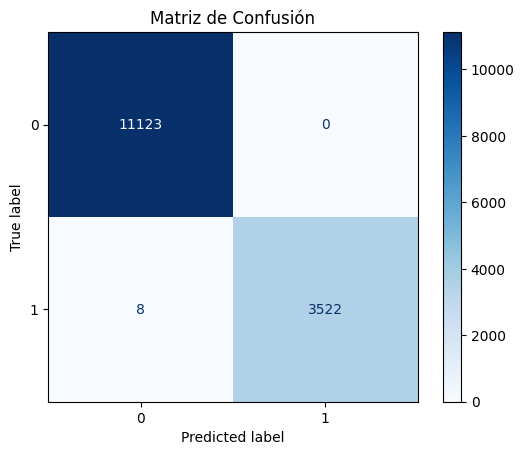

In [110]:
### Metricas a utlizar (matriz de confusion)
target_names = ['0', '1']

c_matrix = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = target_names)
disp.plot(cmap = plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

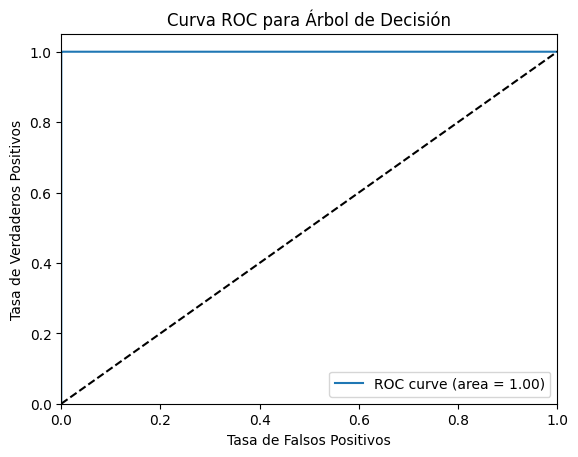

In [108]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Árbol de Decisión')
plt.legend(loc="lower right")
plt.show()

### Evaluacion del modelo CART con ajuste de hiperparametros

In [111]:
test_score = best_model.score(x_test, y_test)
print("Puntuación en el conjunto de prueba:", test_score)

Puntuación en el conjunto de prueba: 0.8317750631270047


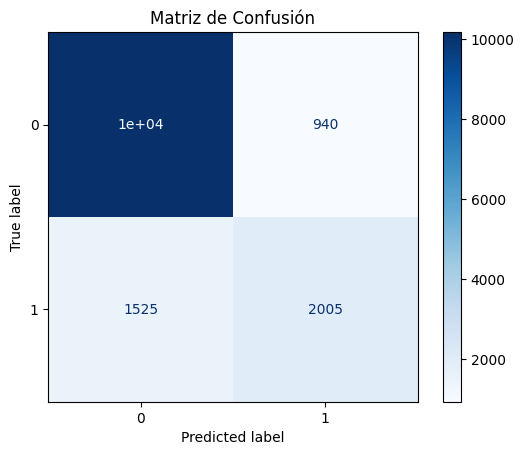

In [46]:
c_matrix_gs = confusion_matrix(y_test, y_predict_gs)
disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix_gs, display_labels = target_names)
disp.plot(cmap = plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

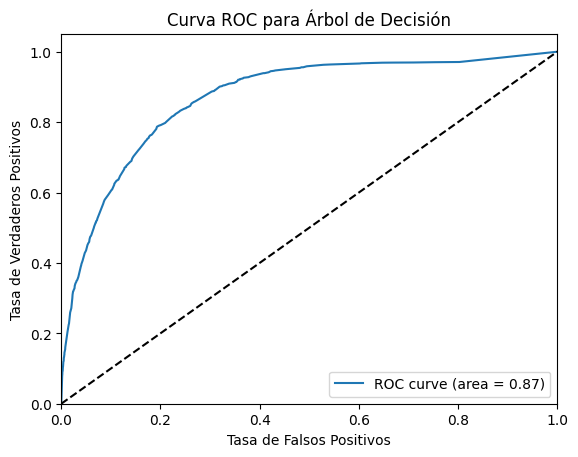

In [115]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_gs)
auc = roc_auc_score(y_test, y_pred_proba_gs)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Árbol de Decisión')
plt.legend(loc="lower right")
plt.show()

### Evaluacion del modelo C4.5 sin ajuste de hiperparametros

In [81]:
c4_5_accuracy = accuracy_score(y_test, c4_5_predictions)
print(c4_5_accuracy)

0.8279533201392206


In [85]:
print(classification_report(y_test, c4_5_predictions))

              precision    recall  f1-score   support

        <=50       0.86      0.92      0.89     11123
         >50       0.68      0.54      0.60      3530

    accuracy                           0.83     14653
   macro avg       0.77      0.73      0.75     14653
weighted avg       0.82      0.83      0.82     14653



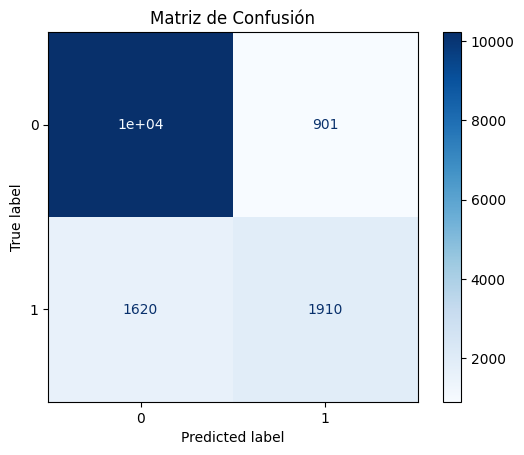

In [83]:
c_matrix_c4_5 = confusion_matrix(y_test, c4_5_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix_c4_5, display_labels = target_names)
disp.plot(cmap = plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

### Evaluacion del modelo C4.5 con ajuste de hiperparametros

In [ ]:
c4_5_accuracy = accuracy_score(dfy_test, c4_5_predictions)
print(c4_5_accuracy)

In [ ]:
c_matrix_c4_5 = confusion_matrix(dfy_test, c4_5_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix_c4_5, display_labels = target_names)
disp.plot(cmap = plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

## Visualizacion del arbol

### Visualizacion del arbol sin ajuste de hiperparametros

In [49]:
cols_names = df_income_le.columns
cols_names

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'target',
       'race__ Asian-Pac-Islander', 'race__ Black', 'race__ Other',
       'race__ White', 'r__ Not-in-family', 'r__ Other-relative',
       'r__ Own-child', 'r__ Unmarried', 'r__ Wife'],
      dtype='object')

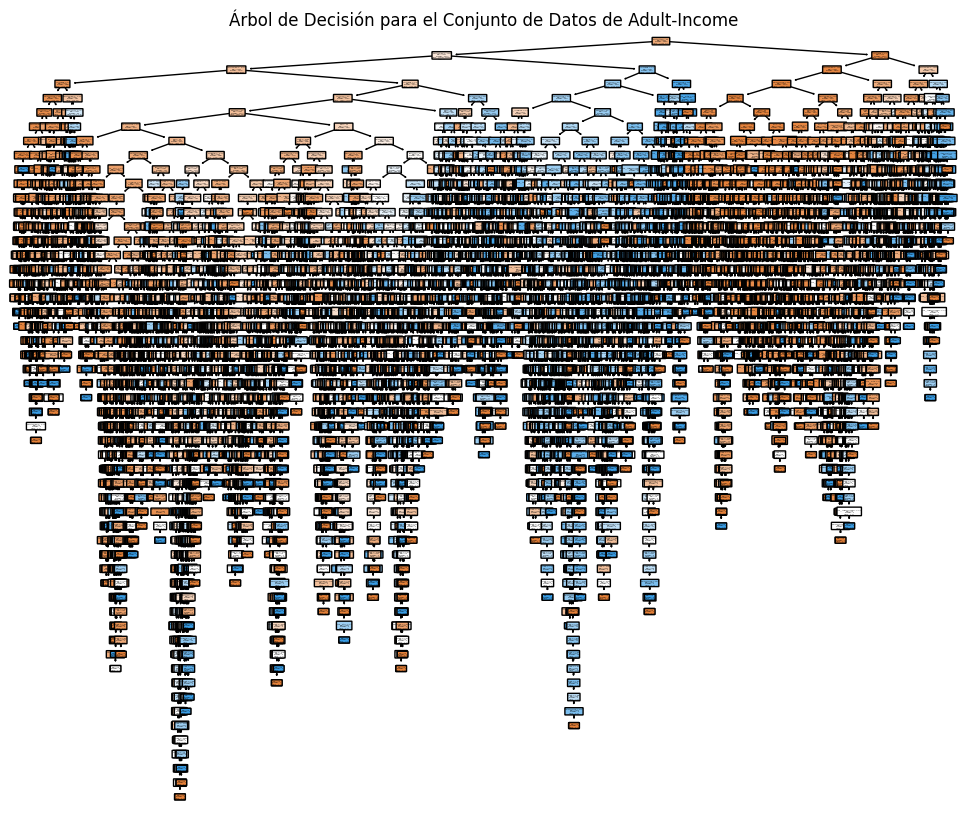

In [43]:
# Visualizar el árbol de decisión
plt.figure(figsize=(12, 10))
plot_tree(clf, feature_names = cols_names, class_names = target_names, filled=True, rounded=True)
plt.title("Árbol de Decisión para el Conjunto de Datos de Adult-Income")
plt.show()

### Visualizacion del arbol con ajuste de hiperparametros

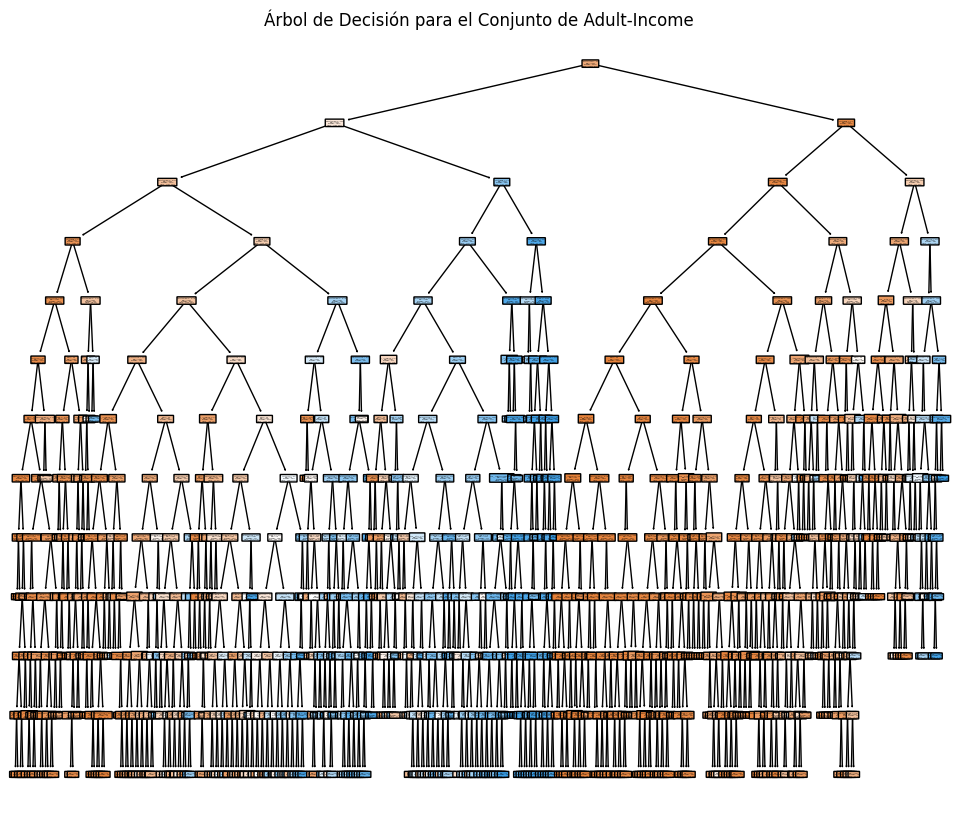

In [50]:
# Visualizar el árbol de decisión
plt.figure(figsize=(12, 10))
plot_tree(best_model, feature_names = cols_names, class_names = target_names, filled=True, rounded=True)
plt.title("Árbol de Decisión para el Conjunto de Adult-Income")
plt.show()

## Conclusiones